# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.

## Task 1

In [2]:
## Read in data
fitness_data = read.csv("fitness_class_2212.csv")

In [3]:
## Check data 
head(fitness_data)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,17,79.56,8,Wed,PM,Strength,0
2,2,10,79.01,2,Mon,AM,HIIT,0
3,3,16,74.53,14,Sun,AM,Strength,0
4,4,5,86.12,10,Fri,AM,Cycling,0
5,5,15,69.29,8,Thu,AM,HIIT,0
6,6,7,93.33,2,Mon,AM,Cycling,0


In [4]:
summary(fitness_data)

   booking_id     months_as_member     weight       days_before       
 Min.   :   1.0   Min.   :  1.00   Min.   : 55.41   Length:1500       
 1st Qu.: 375.8   1st Qu.:  8.00   1st Qu.: 73.49   Class :character  
 Median : 750.5   Median : 12.00   Median : 80.76   Mode  :character  
 Mean   : 750.5   Mean   : 15.63   Mean   : 82.61                     
 3rd Qu.:1125.2   3rd Qu.: 19.00   3rd Qu.: 89.52                     
 Max.   :1500.0   Max.   :148.00   Max.   :170.52                     
                                   NA's   :20                         
 day_of_week            time             category            attended     
 Length:1500        Length:1500        Length:1500        Min.   :0.0000  
 Class :character   Class :character   Class :character   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Mode  :character   Median :0.0000  
                                                          Mean   :0.3027  
                                                         

In [5]:
## Shape of data to understand the overall size
dim(fitness_data)
## Column names: our main variables 
colnames(fitness_data)

[1] 1500    8

[1] "booking_id"       "months_as_member" "weight"           "days_before"     
[5] "day_of_week"      "time"             "category"         "attended"

## Review of data

* There are 8 columns: booking_id, months_as_member, weight, days_before, day_of_week, time, category, attended
* There are 1500 samples in the dataset 


In [6]:
## For each column, 

## Check type 
print('Type of each columns ------------')
sapply(fitness_data, typeof)

## Check if numeric or factorial
print('Type of each columns ------------')
sapply(fitness_data, is.numeric)
sapply(fitness_data, is.factor)

## Check number of NA
print('Number of NA of each columns ------------')
sapply(fitness_data, function(col) sum(is.na(col)))


[1] "Type of each columns ------------"


booking_id months_as_member           weight      days_before 
       "integer"        "integer"         "double"      "character" 
     day_of_week             time         category         attended 
     "character"      "character"      "character"        "integer"

[1] "Type of each columns ------------"


booking_id months_as_member           weight      days_before 
            TRUE             TRUE             TRUE            FALSE 
     day_of_week             time         category         attended 
           FALSE            FALSE            FALSE             TRUE

booking_id months_as_member           weight      days_before 
           FALSE            FALSE            FALSE            FALSE 
     day_of_week             time         category         attended 
           FALSE            FALSE            FALSE            FALSE

[1] "Number of NA of each columns ------------"


booking_id months_as_member           weight      days_before 
               0                0               20                0 
     day_of_week             time         category         attended 
               0                0                0                0

**1a**

* booking_id is nominal and contains no missing data. 

* months_as_member is discrete (integer) and indeed has a minimum value of 1. The column contains no missing values 

* weight is a double (i.e. float) and therefore is continuous, and indeed has 2 decimal places. The minimum weight or sample minimum of our dataset is 55.41, so it cannot be confirmed if the minimum possible weight is 40kg. This column has 20 missing values and is the only variable with NAs. 



* days_before has unfortunately been saved as a 'character' when it should be an integer (numeric). No missing values.
	* Upon closer inspection below, we see that this is because of some entries being saved with 'days' at the end, turning the entire column into a string format. 
	* Hence we first remove 'days' in the entries that contain them and then turn into numeric type 



In [7]:
unique(fitness_data$days_before)

[1] "8"       "2"       "14"      "10"      "6"       "4"       "9"      
 [8] "12"      "5"       "3"       "7"       "13"      "12 days" "20"     
[15] "1"       "15"      "6 days"  "11"      "13 days" "3 days"  "16"     
[22] "1 days"  "7 days"  "8 days"  "10 days" "14 days" "17"      "5 days" 
[29] "2 days"  "4 days"  "29"

In [8]:
## Cleaning days_before

## Use string sub to get rid of the 'days' at the end 
new_days_before <- sub(" days", "", fitness_data$days_before,) ## applies to all entries

## Check
summary(as.numeric(new_days_before))

## Turn numeric and then Substitute 
fitness_data$days_before <- as.numeric(new_days_before)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   9.000   8.347  12.000  29.000 

* day_of_week is factorial and represented by strings, which makes sense, and take on values shown in the table below. Unfortunately, there has been some discrepancies in the data entry and there are some days that have been represented more than once in a non-standard way (e.g. there is 'Fri.' in addition to 'Fri', 'Monday' in addition to 'Mon', etc). This needs to be cleaned and standardised. No missing values.
	* To clean, we will simply only take the first three characters of all entries

In [9]:
## Check distribution of day_of_week
table(fitness_data$day_of_week)


      Fri      Fri.       Mon    Monday       Sat       Sun       Thu       Tue 
      279        26       218        10       202       213       241       195 
      Wed Wednesday 
       81        35 

In [10]:
## Cleaning day of week

## Use the substr method to take the first three letters 
fitness_data$day_of_week <- substr(fitness_data$day_of_week, start = 1, stop = 3)

## Check
table(fitness_data$day_of_week)


Fri Mon Sat Sun Thu Tue Wed 
305 228 202 213 241 195 116 

* time is categorical/factorial, represented by strings, and takes on of two values AM or PM. 

In [11]:
table(fitness_data$time)


  AM   PM 
1141  359 

* as with time, category is factorial and takes on values displayed in the table below. There is an additional category '-' which is unknown, and needs to be cleaned or transformed (replaced with 'unknown'). 

In [12]:
table(fitness_data$category)


       -     Aqua  Cycling     HIIT Strength     Yoga 
      13       76      376      667      233      135 

In [13]:
## Cleaning for category
fitness_data[fitness_data$category == '-',]$category <- 'unknown'

## Check
table(fitness_data$category)


    Aqua  Cycling     HIIT Strength  unknown     Yoga 
      76      376      667      233       13      135 

* attended is our outcome of interest, and is binary (either 1 or 0), with more 0s than 1s. No missing values.

In [14]:
table(fitness_data$attended)


   0    1 
1046  454 

## Task 2

Create visualisations to show how many bookings attended the class

In [15]:
library(ggplot2)

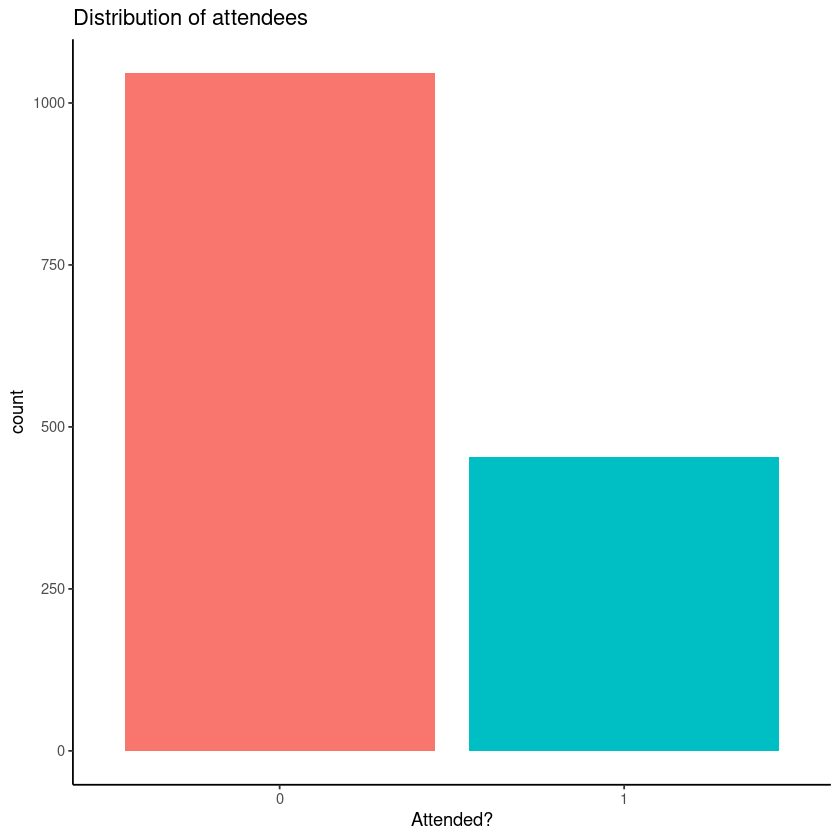

In [16]:
ggplot(fitness_data) + geom_bar(aes(x = as.factor(attended), fill = as.factor(attended))) + 
labs(title = 'Distribution of attendees', x = 'Attended?') +
theme_classic()+
theme(legend.position =  'none')

**2a,b**

As we can see, there are more than twice as many cases of absentees than attendees, i.e. most of the bookings end up unfulfille.d Hence the observations are not balanced across the binary variable. 

## Task 3

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


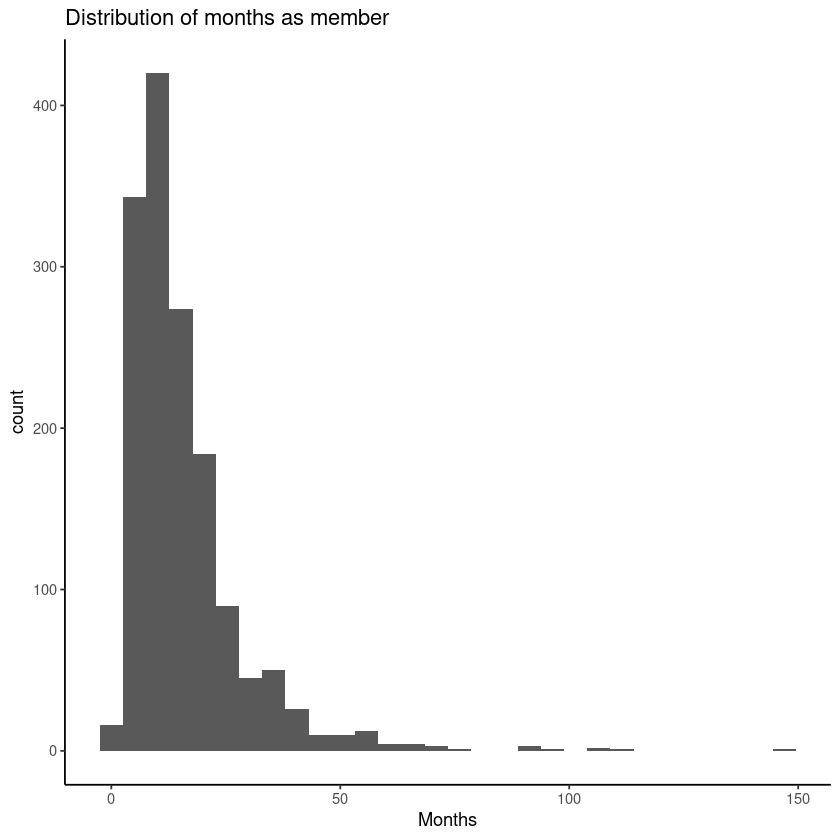

In [17]:
ggplot(fitness_data) + geom_histogram(aes(x = months_as_member)) + labs(title = 'Distribution of months as member', x = 'Months') + theme_classic ()

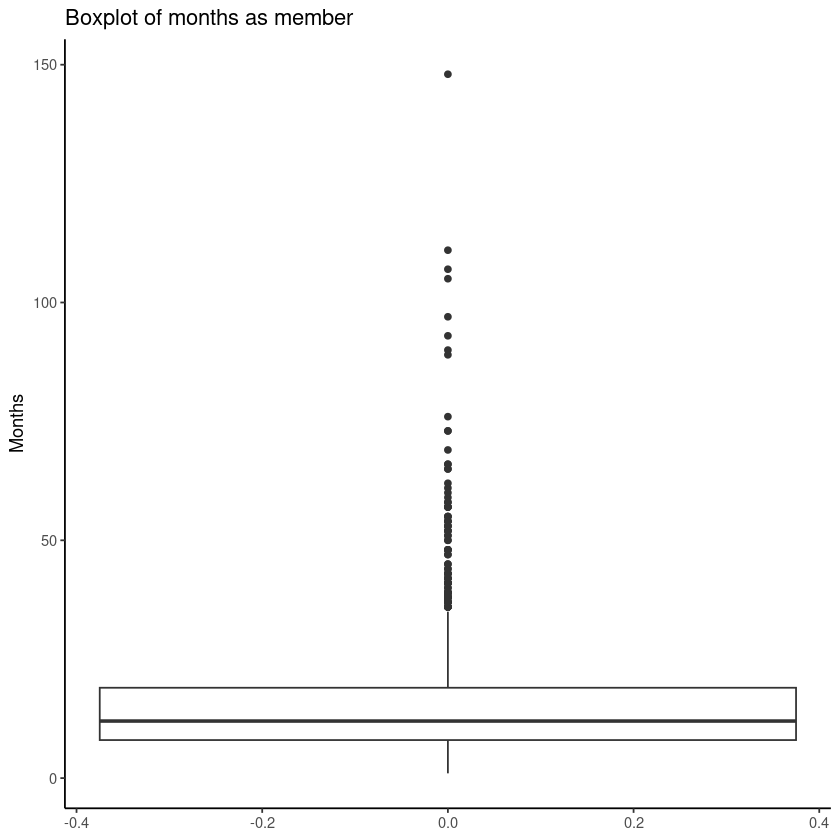

In [18]:
ggplot(fitness_data) + geom_boxplot(aes(y = months_as_member)) + labs(title = 'Boxplot of months as member', y = 'Months') + theme_classic()

**3**

The distribution of the number of months as member, as represented by the above histogram and boxplot, shows a highly right-skewed distribution, resembling something like an exponential distribution, with most of the mass between 0 and 50 months and then dropping drastically after, with the presence of some anomalies with higher than even 100 months. 

## Task 4

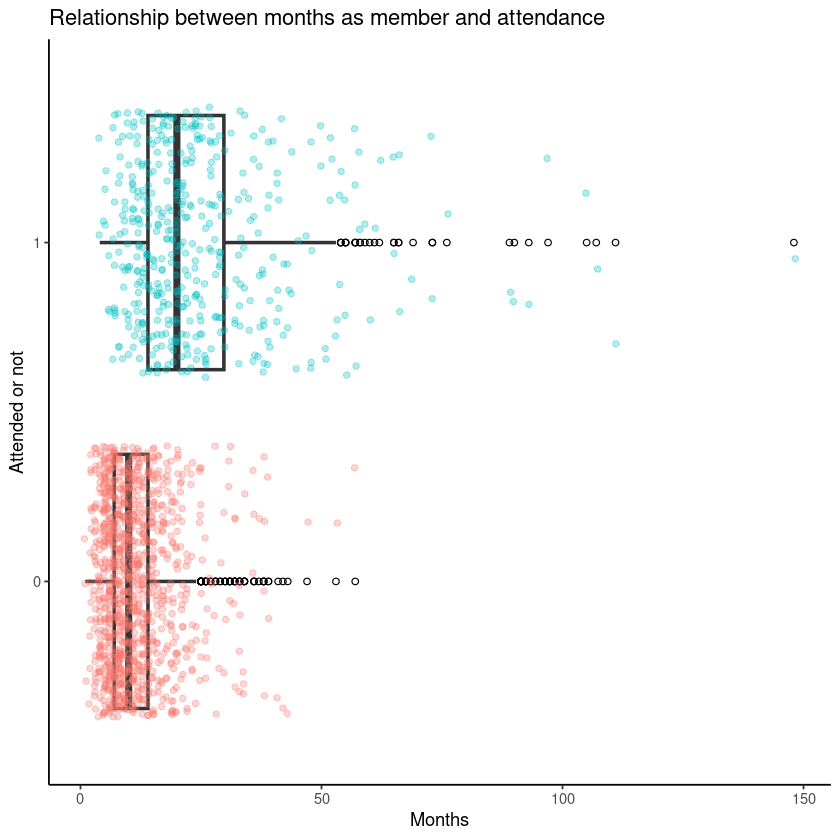

In [19]:
ggplot(fitness_data) + 
geom_boxplot(aes(y = as.factor(attended), x = months_as_member), size = 1, outlier.shape = 1, 
			outlier.color = 'black')  +
geom_jitter(aes(y = as.factor(attended), x = months_as_member, color = as.factor(attended)), alpha = 0.3,
			width = .3)+
labs(x = 'Months', y = 'Attended or not', title = 'Relationship between months as member and attendance') + theme_classic()+ theme(legend.position = 'none')

From the jitter plot of attendance against months as member, we see a positive relationhsip - the longer a person has been a member, the more likely the member will attend the booking. From another point of view, those who didn't attend had a distribution of months closer to 0, mostly between 50 and and 0, while those who attended had mass on higher values of motnhs, up till 150. 

## Task 5 

The appropriate model to predict if the member will attend would be classification. In this case, the outcome is binary and can be seen as categorical, hence modelling a factorial data type is considered classification. 

## Task 6

Before modelling, we split our dataset into train and test split, so that we can later evaluate the models

In [20]:
library(caret)

## Set seed 
set.seed(43)

## Split the data into a training set and a test set
splitIndex <- createDataPartition(fitness_data$attended, p = 0.80, list = FALSE)
fitness_train <- fitness_data[splitIndex, ]
fitness_test  <- fitness_data[-splitIndex, ]

Loading required package: lattice



In [21]:
## Check
colnames(fitness_train)

[1] "booking_id"       "months_as_member" "weight"           "days_before"     
[5] "day_of_week"      "time"             "category"         "attended"

As a baseline model, we will use a simple logistic regression to predict the probability of an observation attending the booking. 

The logistic regression assumes log linearity between the odds of the outcome and the predictors. This means 

* the log of the odds of the event happening (missing a booking) is linearly related to our predictors, i.e. number of months as member, etc

In [22]:
## Run the model
logistic_model = glm(data = fitness_train, 
					formula = attended ~. -booking_id, 
					family = 'binomial') ## for binary outcome

In [23]:
## Check the results 
summary(logistic_model)


Call:
glm(formula = attended ~ . - booking_id, family = "binomial", 
    data = fitness_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9747  -0.6793  -0.4868   0.5300   2.6739  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.480673   1.526140   0.315   0.7528    
months_as_member  0.123513   0.010350  11.933   <2e-16 ***
weight           -0.012760   0.007546  -1.691   0.0908 .  
days_before      -0.197904   0.133015  -1.488   0.1368    
day_of_weekMon   -1.462933   1.091090  -1.341   0.1800    
day_of_weekSat    0.455683   0.374716   1.216   0.2240    
day_of_weekSun    1.212803   0.606087   2.001   0.0454 *  
day_of_weekThu   -0.143544   0.372077  -0.386   0.6997    
day_of_weekTue   -0.989803   0.854379  -1.159   0.2467    
day_of_weekWed   -1.266696   0.661369  -1.915   0.0555 .  
timePM           -0.119792   0.201449  -0.595   0.5521    
categoryCycling  -0.527741   0.347274  -1.520   0.1286    
category

## Task 7

I shall use XGBoost for the second model. XGBoost has been shown to rival neural networks in the context of tabular, structured data. It is based on decision trees that are trained sequentially, each tree being fitted the to the previous tree's errors

In [24]:
sapply(fitness_data, is.character)

booking_id months_as_member           weight      days_before 
           FALSE            FALSE            FALSE            FALSE 
     day_of_week             time         category         attended 
            TRUE             TRUE             TRUE            FALSE

In [25]:
colnames(fitness_data)

[1] "booking_id"       "months_as_member" "weight"           "days_before"     
[5] "day_of_week"      "time"             "category"         "attended"

In [32]:
library(xgboost)

## Unfortunately, before we can turn our data into a data matrix, we first need to 'quantify' our categorical variables, i.e. day_of_week and category. 

## Use caret for this task
library(caret)
## Define the formula specifying the columns to be one-hot encoded
formula_ohe <- ~ day_of_week + category + time

## Create dummy variable transformation
dummies <- dummyVars(formula_ohe, data = fitness_train, fullRank = TRUE)

## Apply transformation to data to get one-hot encoded columns
ohe_train_cols <- predict(dummies, newdata = fitness_train)
ohe_test_cols <- predict(dummies, newdata=fitness_test)

## Check
dim(ohe_train_cols)
dim(ohe_test_cols)

[1] 1200   12

[1] 300  12

In [35]:
## Now, add in the OHE into the original dataset

## Drop 'booking_id' column (not helpful) and the original 'day_of_week' and 'category' columns
fitness_train_remove_cat_cols <- fitness_train[, !(names(fitness_data) %in% c("booking_id", "day_of_week", "category", "time"))]

## Repeat for test col
fitness_test_remove_cat_cols <- fitness_test[, !(names(fitness_data) %in% c("booking_id", "day_of_week", "category", "time"))]


# Combine the original dataset with the one-hot encoded columns
fitness_train_final <- cbind(fitness_train_remove_cat_cols, ohe_train_cols)

## Also create a final dataset for the test col for predicting later (for XGB)
fitness_test_final <- cbind(fitness_test_remove_cat_cols, ohe_test_cols)

In [62]:
## Save only predictors now
library('dplyr')
fitness_train_preds <- fitness_train_final %>% select(-attended)
## Repeat for test
fitness_test_preds <- fitness_test_final %>% select(-attended)


## Check
colnames(fitness_train_preds)



[1] "months_as_member" "weight"           "days_before"      "day_of_weekMon"  
 [5] "day_of_weekSat"   "day_of_weekSun"   "day_of_weekThu"   "day_of_weekTue"  
 [9] "day_of_weekWed"   "categoryCycling"  "categoryHIIT"     "categoryStrength"
[13] "categoryunknown"  "categoryYoga"     "timePM"

In [38]:
## Now, FIT THE XGB!
# Convert data to DMatrix format, which is a recommended efficient format for XGBoost
data_matrix <- xgb.DMatrix(data = as.matrix(fitness_train_preds), label = fitness_train$attended)

## Test some hyperparams 
params <- list(
  booster = "gbtree",
  objective = "binary:logistic", ## use correct objective function for binary outcome
  eta = 0.3,
  max_depth = 6,
  eval_metric = "logloss"
)


In [39]:
num_rounds <- 50
xgb_model <- xgb.train(params = params, data = data_matrix, nrounds = num_rounds)

In [40]:
## Check model results
print(xgb_model)

##### xgb.Booster
raw: 110.6 Kb 
call:
  xgb.train(params = params, data = data_matrix, nrounds = num_rounds)
params (as set within xgb.train):
  booster = "gbtree", objective = "binary:logistic", eta = "0.3", max_depth = "6", eval_metric = "logloss", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
# of features: 15 
niter: 50
nfeatures : 15 


## Task 8

Reasons for logistic regression:

* Simple model: analogous to linear regression (but with a link function, and binomial instead of normal outcome), logistic regression is very simple and easily interpretable, in terms of each predictor's effect on the log odds. 


Reasons for XGBoost:

* As mentioned, one of the most popular models for structured data due to its predictive power. Unlike linear methods such as logistic regression, it is able to capture non-linear relationships between the data and the outcome. Can also capture interactions between predictors.


## Task 9

For this task, we will use **AUC** to compare the two binary classification methods. 

AUC represents the probability that a randomly chosen datapoint (that has y = 1, or in this people that actually attended) being ranked higher than a negative instance. 

* It is the area under the ROC curce, and measures how well a method classifies positive and negative outcomes at all possible cutoffs. It does not require the use of a threshold.
* The higher the AUC, the better. 1 suggests perfect classification, while 0.5 represents no better than random guessing

In [61]:
install.packages('Metrics')

library(Metrics)

## Get predictions for logistic model 
preds_logistic <- predict(logistic_model, newdata = fitness_test, type = "response")

## Check
head(preds_logistic)
length(preds_logistic)

## Get AUC for logistic model 
auc_logistic <- auc(fitness_test$attended, preds_logistic)

## Print logistic AUC 
print(auc_logistic)

Installing Metrics [0.1.4] ...
	OK [linked cache]


8         10         14         26         34         36 
0.14605800 0.12927807 0.13261224 0.07863622 0.10161147 0.08232020

[1] 300

[1] 0.792328


In [64]:
## Get predictions for xgb
preds_xgb <- predict(xgb_model,newdata =xgb.DMatrix(as.matrix(fitness_test_preds)))

## Check preds 
head(preds_xgb)
length(preds_xgb)

## Get AUC
auc_xgb <- auc(fitness_test$attended, preds_xgb)

## Print logistic AUC 
print(auc_xgb)


[1] 0.039769150 0.125565574 0.401764870 0.010037262 0.009729193 0.132095933

[1] 300

[1] 0.7696032


We can also use classification accuracy, which is more easily understood and interpretable. For this task, we will simply use 0.5 as threshold. 

In [68]:
threshold = 0.5
## Get model binary predictions
preds_binary_logistic <- as.integer(preds_logistic > threshold)
preds_binary_xgb <- as.integer(preds_xgb > threshold)

## Get confusion matrix 
cm_logistic <- table(actual = fitness_test$attended, log_pred = preds_binary_logistic)
cm_xgb <- table(actual = fitness_test$attended, xgb_pred = preds_binary_xgb)

## See both 
cm_logistic; cm_xgb

## Print accuracy
accuracy_logistic <- sum(diag(cm_logistic))/sum(cm_logistic)
accuracy_xgb <- sum(diag(cm_xgb))/sum(cm_xgb)

## Compare
print(accuracy_logistic);print(accuracy_xgb)

      log_pred
actual   0   1
     0 186  21
     1  52  37

      xgb_pred
actual   0   1
     0 179  31
     1  44  46

[1] 0.7533784
[1] 0.75


On both metrics (AUC and classification accuracy), logistic regression wins. This could be due to the reality of the nature of the data that is captured and generalised much better by the linearity based logistic regression, compared to how XGBoost excels at non-linearity. Furthermore, the XGB model is variable with the chosen hyperparameters, and we did not perform any tuning here. XGB tends to perform better with larger datasets as well (both n and p), and this was a small to medium sized dataset, which may be better with simpler models like logistic regression. 